In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
from sklearn.model_selection import train_test_split
pd.set_option('display.show_dimensions', True)
pd.set_option('display.max_columns', None)
%matplotlib inline
plt.style.use('fivethirtyeight')
warnings.simplefilter('ignore')

In [2]:
data_before_imputation = pd.read_csv('/home/yungshun/workspace/py/sklearn-aftygh-respiratory-therapy/datasets/data_before_imputation_v2.csv')

In [3]:
data_before_imputation.head()

,病歷號,收件日期,收件時間,Temperature,pH,pCO2,pO2,HCO3,TCO2,ABE,SBE,SBC,SAT,Na,K,Mg,Cl,BUN (B),Creatinine(B),mode,peep,fio2,tidal volume,respiratory rate,minute ventilation,spo2
0,114400,20130125,714,37.0,7.267,59.0,459.4,27.1,28.9,-0.6,-0.1,24.0,100.0,141.4,4.71,NaN,NaN,48.1,2.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,114400,20130125,1027,37.0,7.281,59.3,94.0,28.1,30.0,0.5,1.1,24.8,96.0,141.4,4.71,NaN,NaN,48.1,2.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,114400,20130125,1250,37.0,7.287,54.0,136.5,26.0,27.6,-1.1,-0.9,23.5,98.7,141.4,4.71,NaN,NaN,48.1,2.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,114400,20130126,959,37.0,7.183,81.7,53.2,31.0,33.5,0.6,2.4,24.4,76.3,NaN,NaN,NaN,NaN,NaN,NaN,BIPAP+PS,8.0,50.0,414.0,14.0,6.0,99.0
4,114400,20130327,128,37.0,7.098,178.8,65.3,55.7,61.2,18.5,25.8,42.3,78.2,140.8,3.40,NaN,NaN,50.8,2.49,PCV,8.0,80.0,451.0,18.0,8.2,98.0


In [4]:
data_before_imputation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   病歷號                 1292 non-null   int64  
 1   收件日期                1292 non-null   int64  
 2   收件時間                1292 non-null   int64  
 3   Temperature         1292 non-null   float64
 4   pH                  1292 non-null   float64
 5   pCO2                1292 non-null   float64
 6   pO2                 1292 non-null   float64
 7   HCO3                1292 non-null   float64
 8   TCO2                1291 non-null   float64
 9   ABE                 1292 non-null   float64
 10  SBE                 1292 non-null   float64
 11  SBC                 1292 non-null   float64
 12  SAT                 1292 non-null   float64
 13  Na                  682 non-null    float64
 14  K                   733 non-null    float64
 15  Mg                  107 non-null    float64
 16  Cl    

In [108]:
data_before_imputation_describe = data_before_imputation.describe()
data_before_imputation_describe

,病歷號,收件日期,收件時間,Temperature,pH,pCO2,pO2,HCO3,TCO2,ABE,SBE,SBC,SAT,Na,K,Mg,Cl,BUN (B),Creatinine(B),peep,fio2,tidal volume,respiratory rate,minute ventilation,spo2
count,1.292000e+03,1.292000e+03,1292.000000,1292.0,1292.000000,1292.000000,1292.000000,1292.000000,1291.000000,1292.000000,1292.000000,1292.000000,1292.000000,682.000000,733.000000,107.000000,174.000000,509.000000,583.000000,822.000000,853.000000,673.000000,822.000000,616.000000,869.000000
mean,7.486876e+07,2.012966e+07,1149.834365,37.0,7.380861,42.895511,125.446440,24.240480,25.528970,-0.703947,-0.958746,24.058204,93.165944,136.402933,4.145962,1.815701,105.625287,33.855796,1.904786,6.923358,69.764361,514.977533,25.437956,10.158247,94.305524
std,3.447042e+07,6.121919e+03,602.170663,0.0,0.121974,19.707491,91.814742,6.907559,7.256808,6.319363,7.377381,5.287096,10.940900,7.708926,0.927786,0.399325,8.616441,30.701660,2.075821,1.530116,28.903873,137.938565,28.006793,3.521623,14.273845
min,1.144000e+05,2.012043e+07,1.000000,37.0,6.742000,7.800000,17.400000,1.500000,1.800000,-33.600000,-34.000000,4.000000,19.000000,106.700000,1.980000,0.490000,81.000000,1.000000,0.100000,4.000000,21.000000,0.880000,6.000000,0.800000,1.000000
25%,9.203562e+07,2.012122e+07,704.750000,37.0,7.327000,30.700000,66.100000,19.800000,20.900000,-4.325000,-5.500000,20.800000,92.600000,132.725000,3.500000,1.580000,101.000000,12.600000,0.675000,6.000000,40.000000,436.000000,18.000000,7.855000,97.000000
50%,9.225967e+07,2.013062e+07,1127.000000,37.0,7.407000,38.200000,94.700000,23.700000,25.100000,-0.600000,-1.000000,23.900000,97.200000,136.400000,4.080000,1.770000,106.000000,23.100000,1.110000,8.000000,70.000000,509.000000,20.000000,9.500000,99.000000
75%,9.244060e+07,2.013102e+07,1602.500000,37.0,7.464000,48.025000,150.725000,28.100000,29.600000,3.000000,3.300000,27.000000,99.100000,140.000000,4.640000,2.030000,110.775000,48.100000,2.125000,8.000000,100.000000,584.000000,25.000000,11.800000,100.000000
max,9.930224e+07,2.014061e+07,2357.000000,37.0,7.805000,193.000000,578.700000,56.300000,61.200000,22.900000,29.200000,48.000000,100.000000,168.000000,8.500000,2.790000,135.000000,252.000000,13.760000,14.000000,100.000000,1056.000000,520.000000,26.000000,197.000000


In [109]:
data_before_imputation_describe_subplots = data_before_imputation_describe.drop(index=['count', 'std'])
data_before_imputation_describe_subplots = data_before_imputation_describe.drop(columns=['病歷號', '收件日期', '收件時間', 'Temperature'])
data_before_imputation_describe_subplots

,pH,pCO2,pO2,HCO3,TCO2,ABE,SBE,SBC,SAT,Na,K,Mg,Cl,BUN (B),Creatinine(B),peep,fio2,tidal volume,respiratory rate,minute ventilation,spo2
count,1292.000000,1292.000000,1292.000000,1292.000000,1291.000000,1292.000000,1292.000000,1292.000000,1292.000000,682.000000,733.000000,107.000000,174.000000,509.000000,583.000000,822.000000,853.000000,673.000000,822.000000,616.000000,869.000000
mean,7.380861,42.895511,125.446440,24.240480,25.528970,-0.703947,-0.958746,24.058204,93.165944,136.402933,4.145962,1.815701,105.625287,33.855796,1.904786,6.923358,69.764361,514.977533,25.437956,10.158247,94.305524
std,0.121974,19.707491,91.814742,6.907559,7.256808,6.319363,7.377381,5.287096,10.940900,7.708926,0.927786,0.399325,8.616441,30.701660,2.075821,1.530116,28.903873,137.938565,28.006793,3.521623,14.273845
min,6.742000,7.800000,17.400000,1.500000,1.800000,-33.600000,-34.000000,4.000000,19.000000,106.700000,1.980000,0.490000,81.000000,1.000000,0.100000,4.000000,21.000000,0.880000,6.000000,0.800000,1.000000
25%,7.327000,30.700000,66.100000,19.800000,20.900000,-4.325000,-5.500000,20.800000,92.600000,132.725000,3.500000,1.580000,101.000000,12.600000,0.675000,6.000000,40.000000,436.000000,18.000000,7.855000,97.000000
50%,7.407000,38.200000,94.700000,23.700000,25.100000,-0.600000,-1.000000,23.900000,97.200000,136.400000,4.080000,1.770000,106.000000,23.100000,1.110000,8.000000,70.000000,509.000000,20.000000,9.500000,99.000000
75%,7.464000,48.025000,150.725000,28.100000,29.600000,3.000000,3.300000,27.000000,99.100000,140.000000,4.640000,2.030000,110.775000,48.100000,2.125000,8.000000,100.000000,584.000000,25.000000,11.800000,100.000000
max,7.805000,193.000000,578.700000,56.300000,61.200000,22.900000,29.200000,48.000000,100.000000,168.000000,8.500000,2.790000,135.000000,252.000000,13.760000,14.000000,100.000000,1056.000000,520.000000,26.000000,197.000000


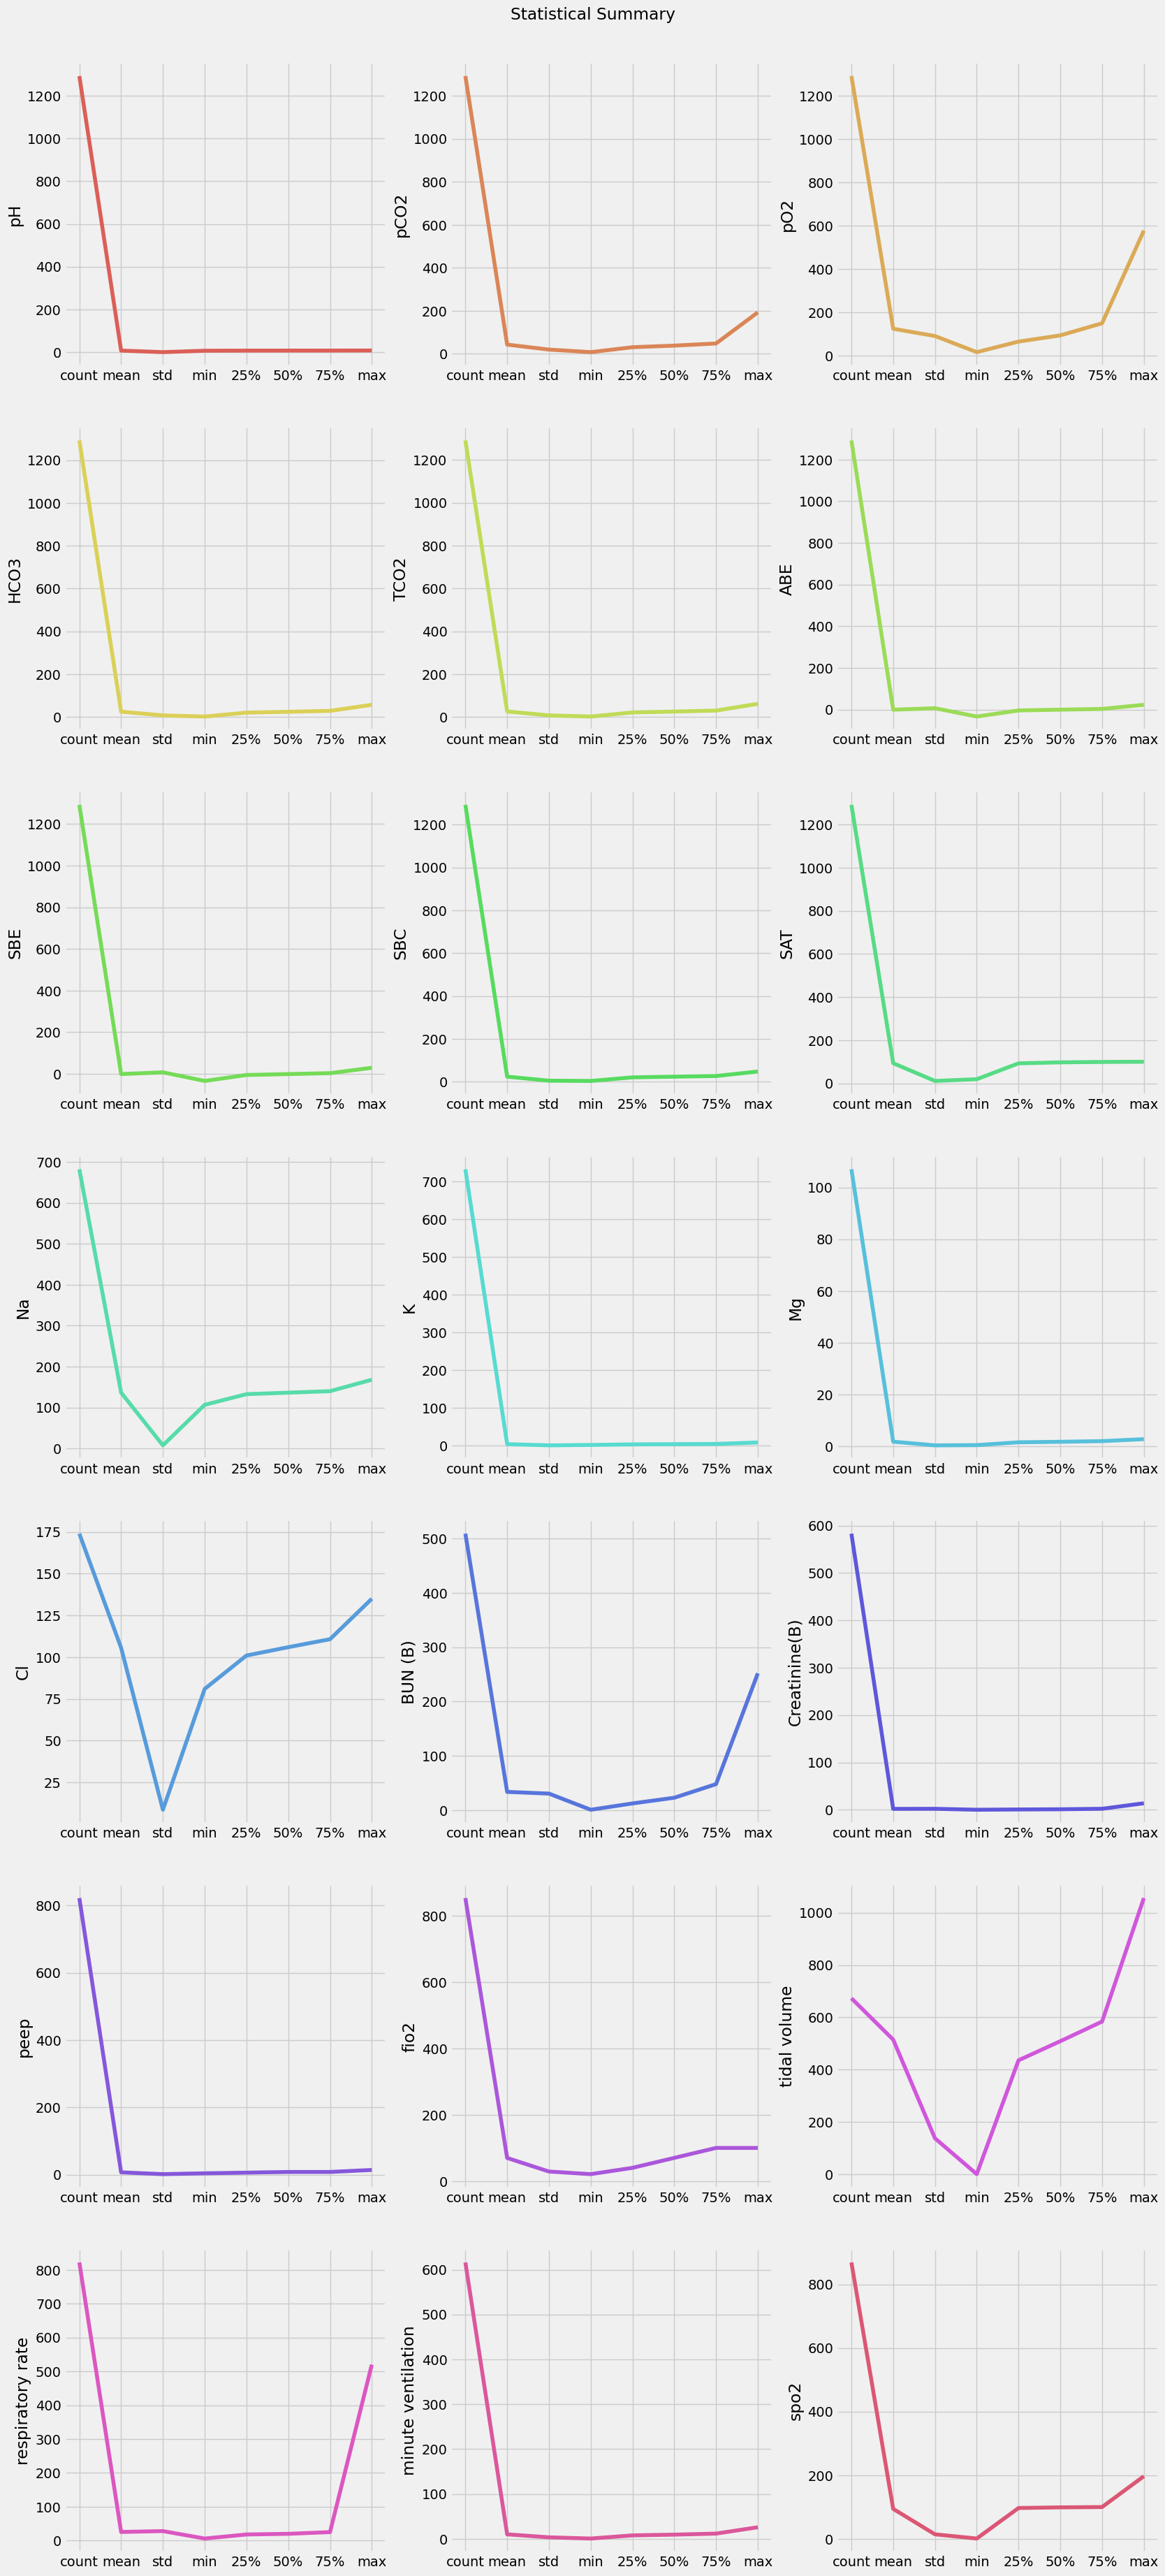

In [126]:
fig, axes = plt.subplots(7, 3, figsize=(18, 44))
 
fig.suptitle('Statistical Summary')

pal = sns.color_palette("hls", 21).as_hex()

for column, ax, color in zip(data_before_imputation_describe_subplots, axes.flatten(), pal):
    sns.lineplot(x=data_before_imputation_describe_subplots.index, y=column,  data=data_before_imputation_describe_subplots, ax=ax, color=color)
    
def make_space_above(axes, topmargin=1):
    """ increase figure size to make topmargin (in inches) space for 
        titles, without changing the axes sizes"""
    fig = axes.flatten()[0].figure
    s = fig.subplotpars
    w, h = fig.get_size_inches()

    figh = h - (1-s.top)*h  + topmargin
    fig.subplots_adjust(bottom=s.bottom*h/figh, top=1-topmargin/figh)
    fig.set_figheight(figh)

make_space_above(axes, topmargin=1.6) 

plt.savefig('/home/yungshun/workspace/py/sklearn-aftygh-respiratory-therapy/datasets/statistical_summary.png', bbox_inches='tight')

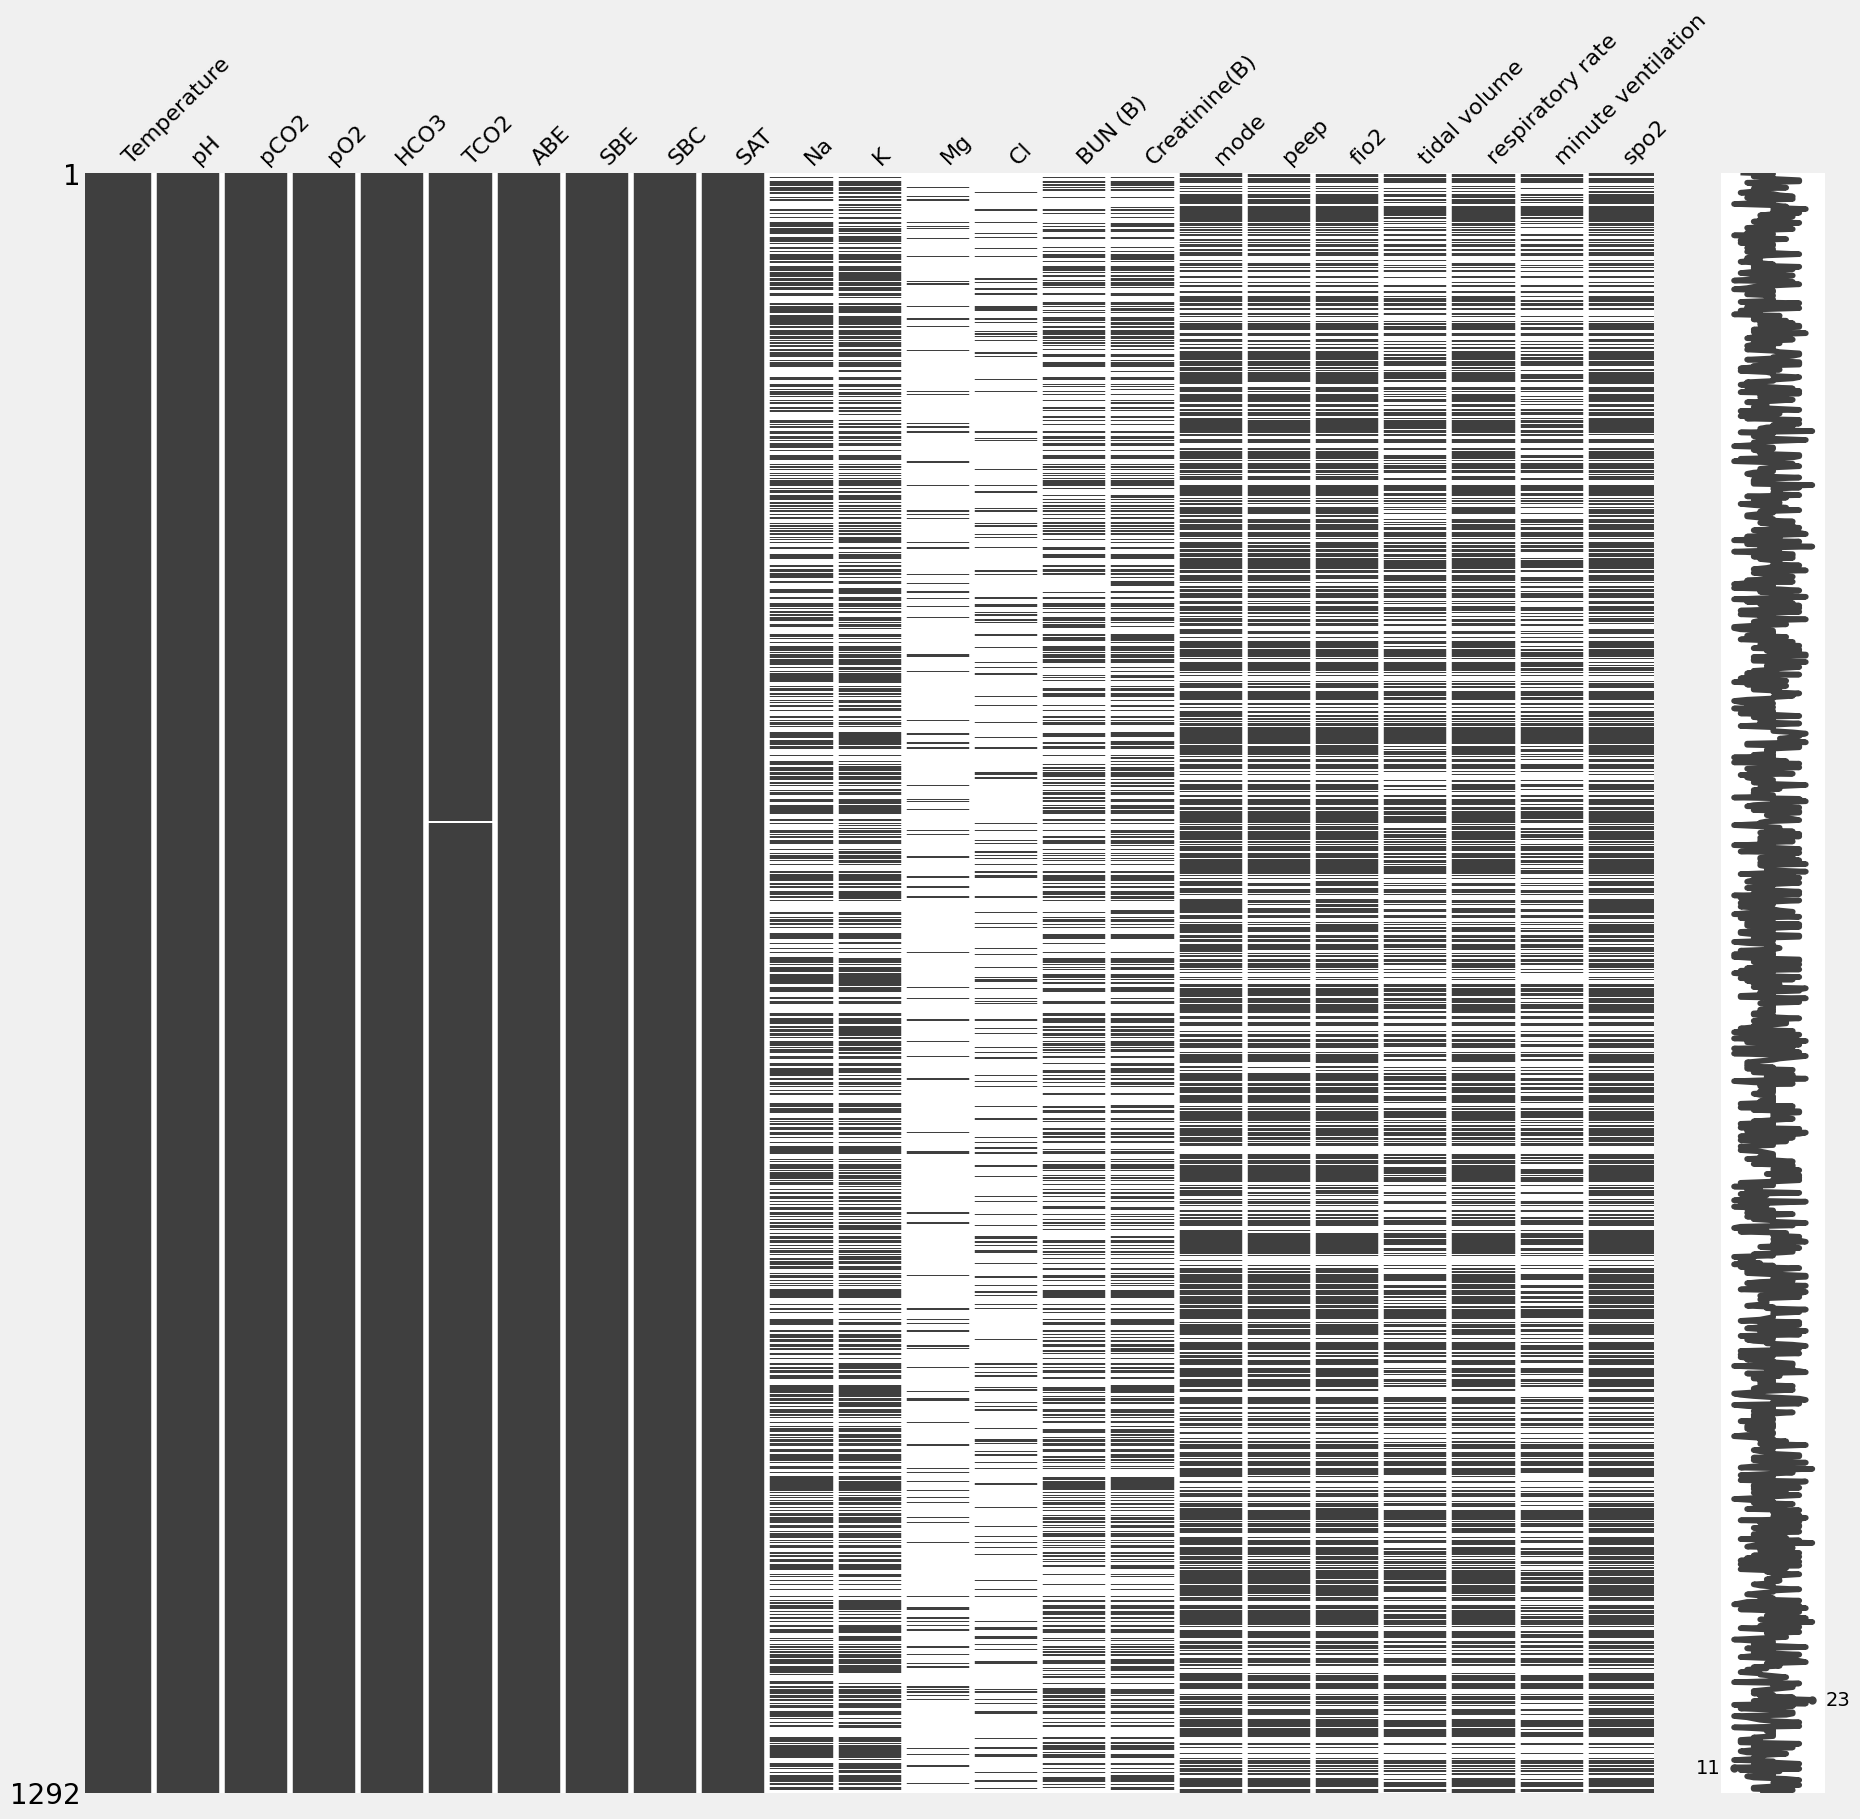

In [125]:
data_before_imputation_missingno = data_before_imputation.drop(columns=['病歷號', '收件日期', '收件時間'])

msno.matrix(data_before_imputation_missingno.sample(1292), figsize=(20, 20))

plt.savefig('/home/yungshun/workspace/py/sklearn-aftygh-respiratory-therapy/datasets/missingno_matrix.png', bbox_inches='tight')

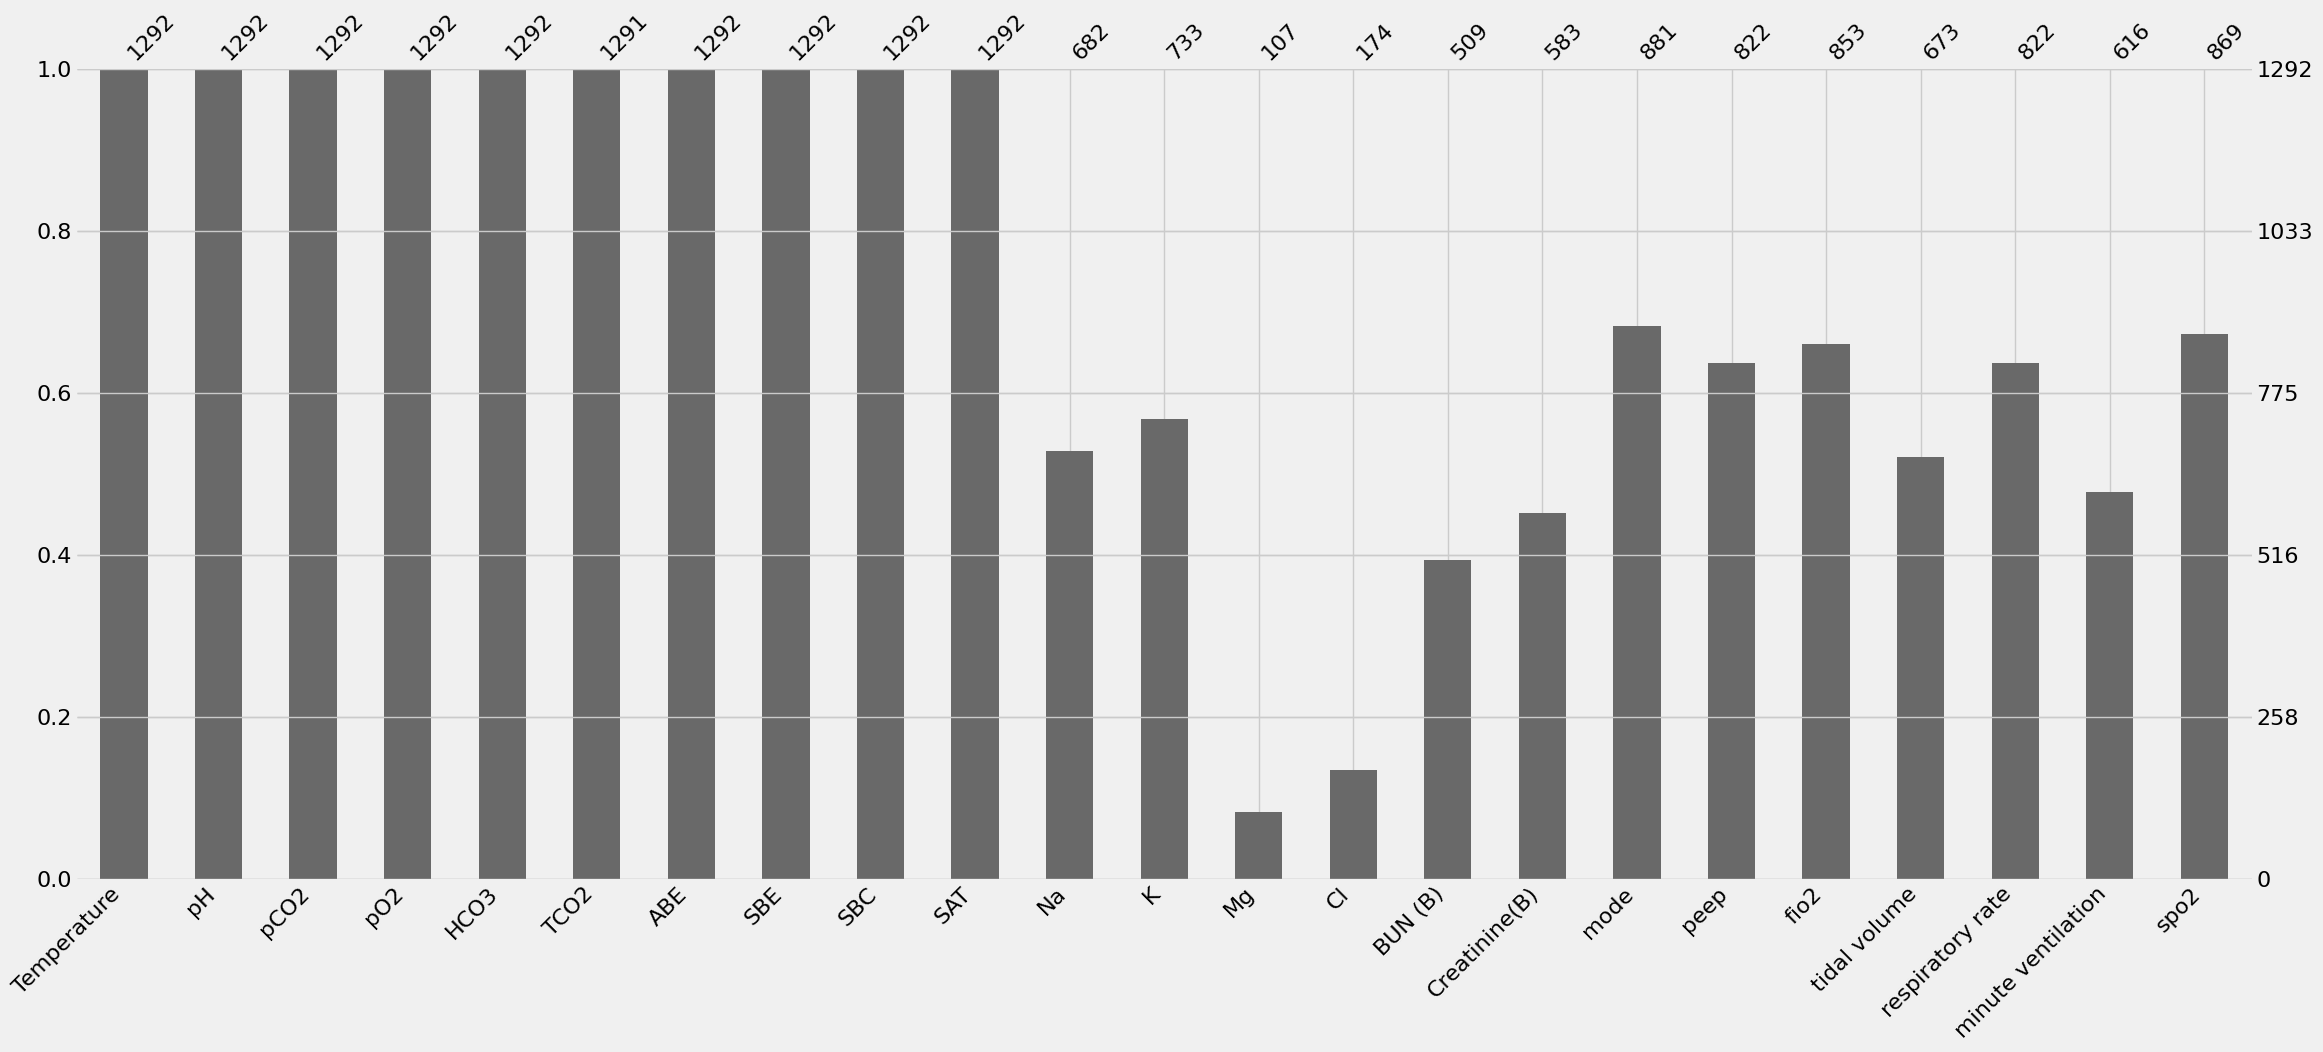

In [130]:
msno.bar(data_before_imputation_missingno.sample(1292))

plt.savefig('/home/yungshun/workspace/py/sklearn-aftygh-respiratory-therapy/datasets/missingno_bar.png', bbox_inches='tight')

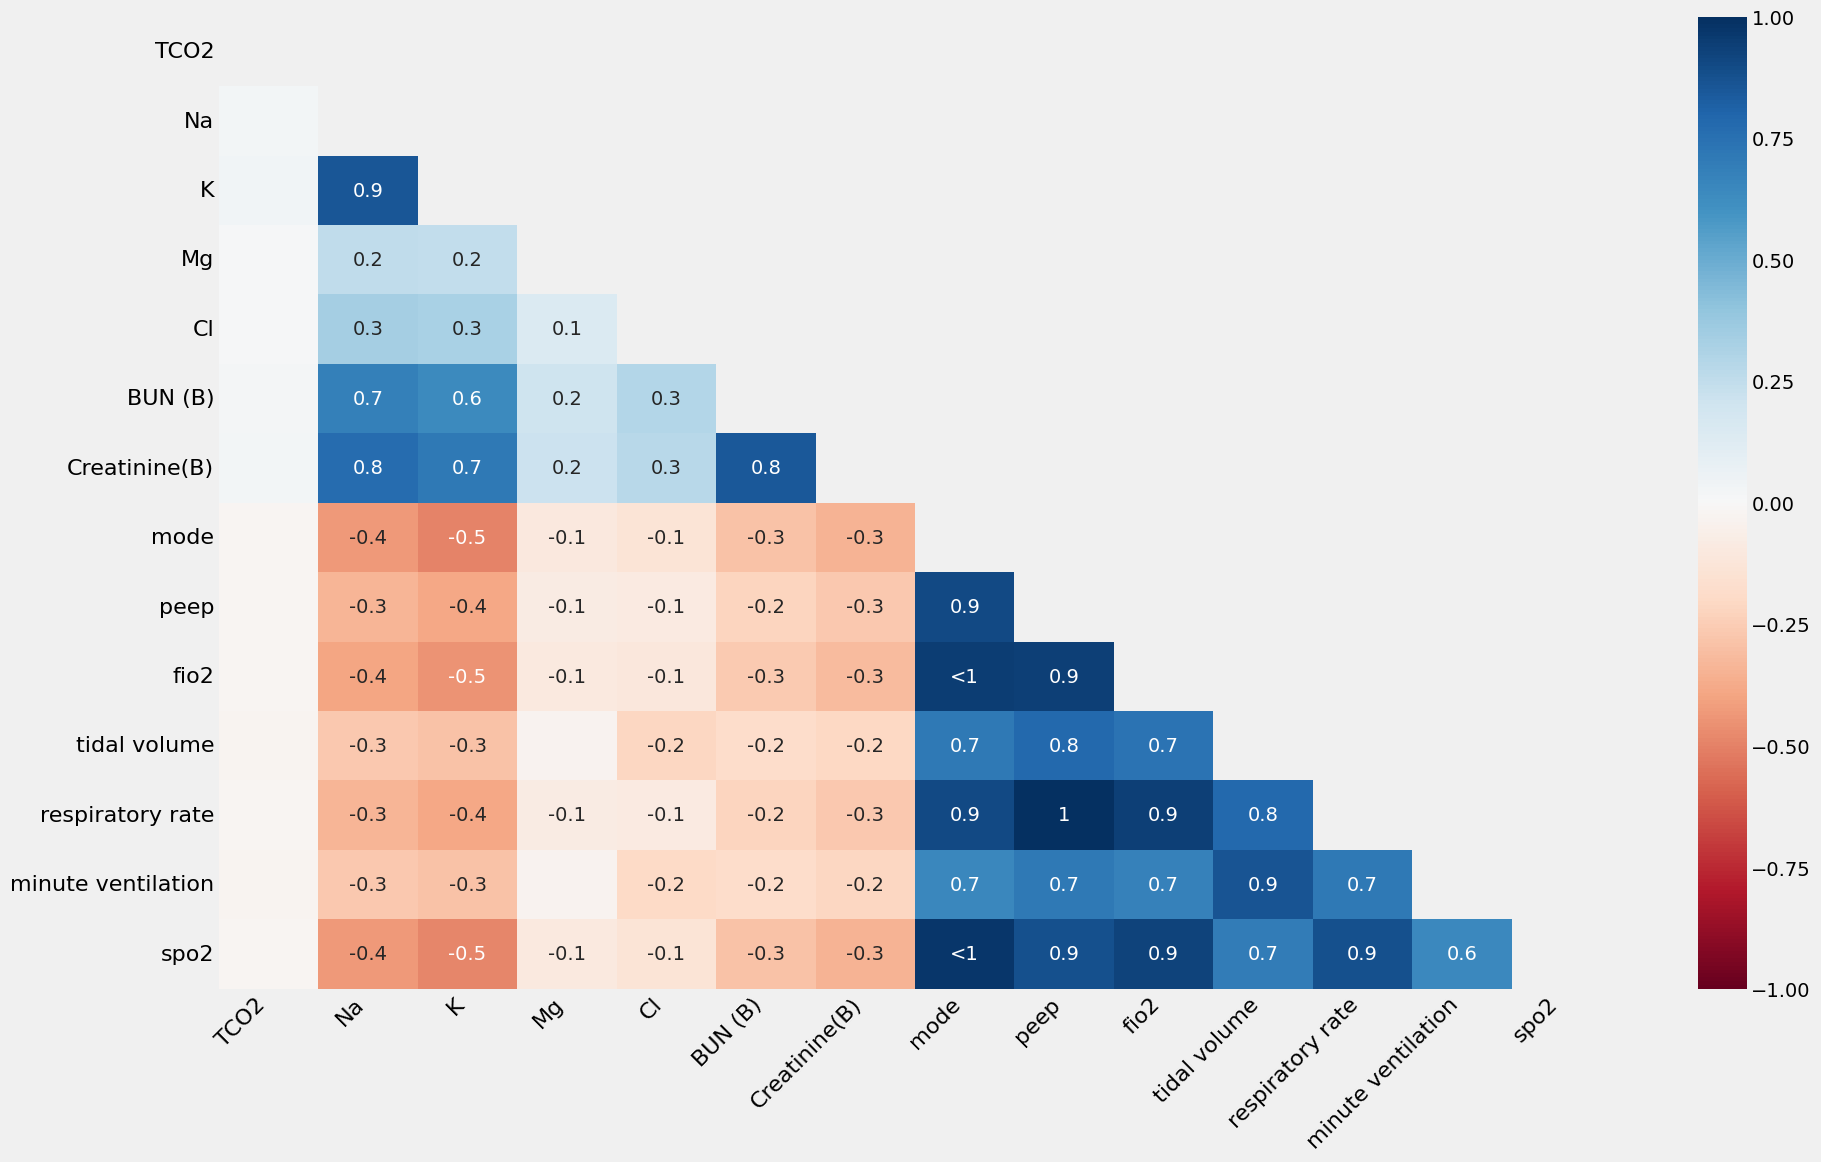

In [129]:
msno.heatmap(data_before_imputation_missingno)

plt.savefig('/home/yungshun/workspace/py/sklearn-aftygh-respiratory-therapy/datasets/missingno_heatmap.png', bbox_inches='tight')

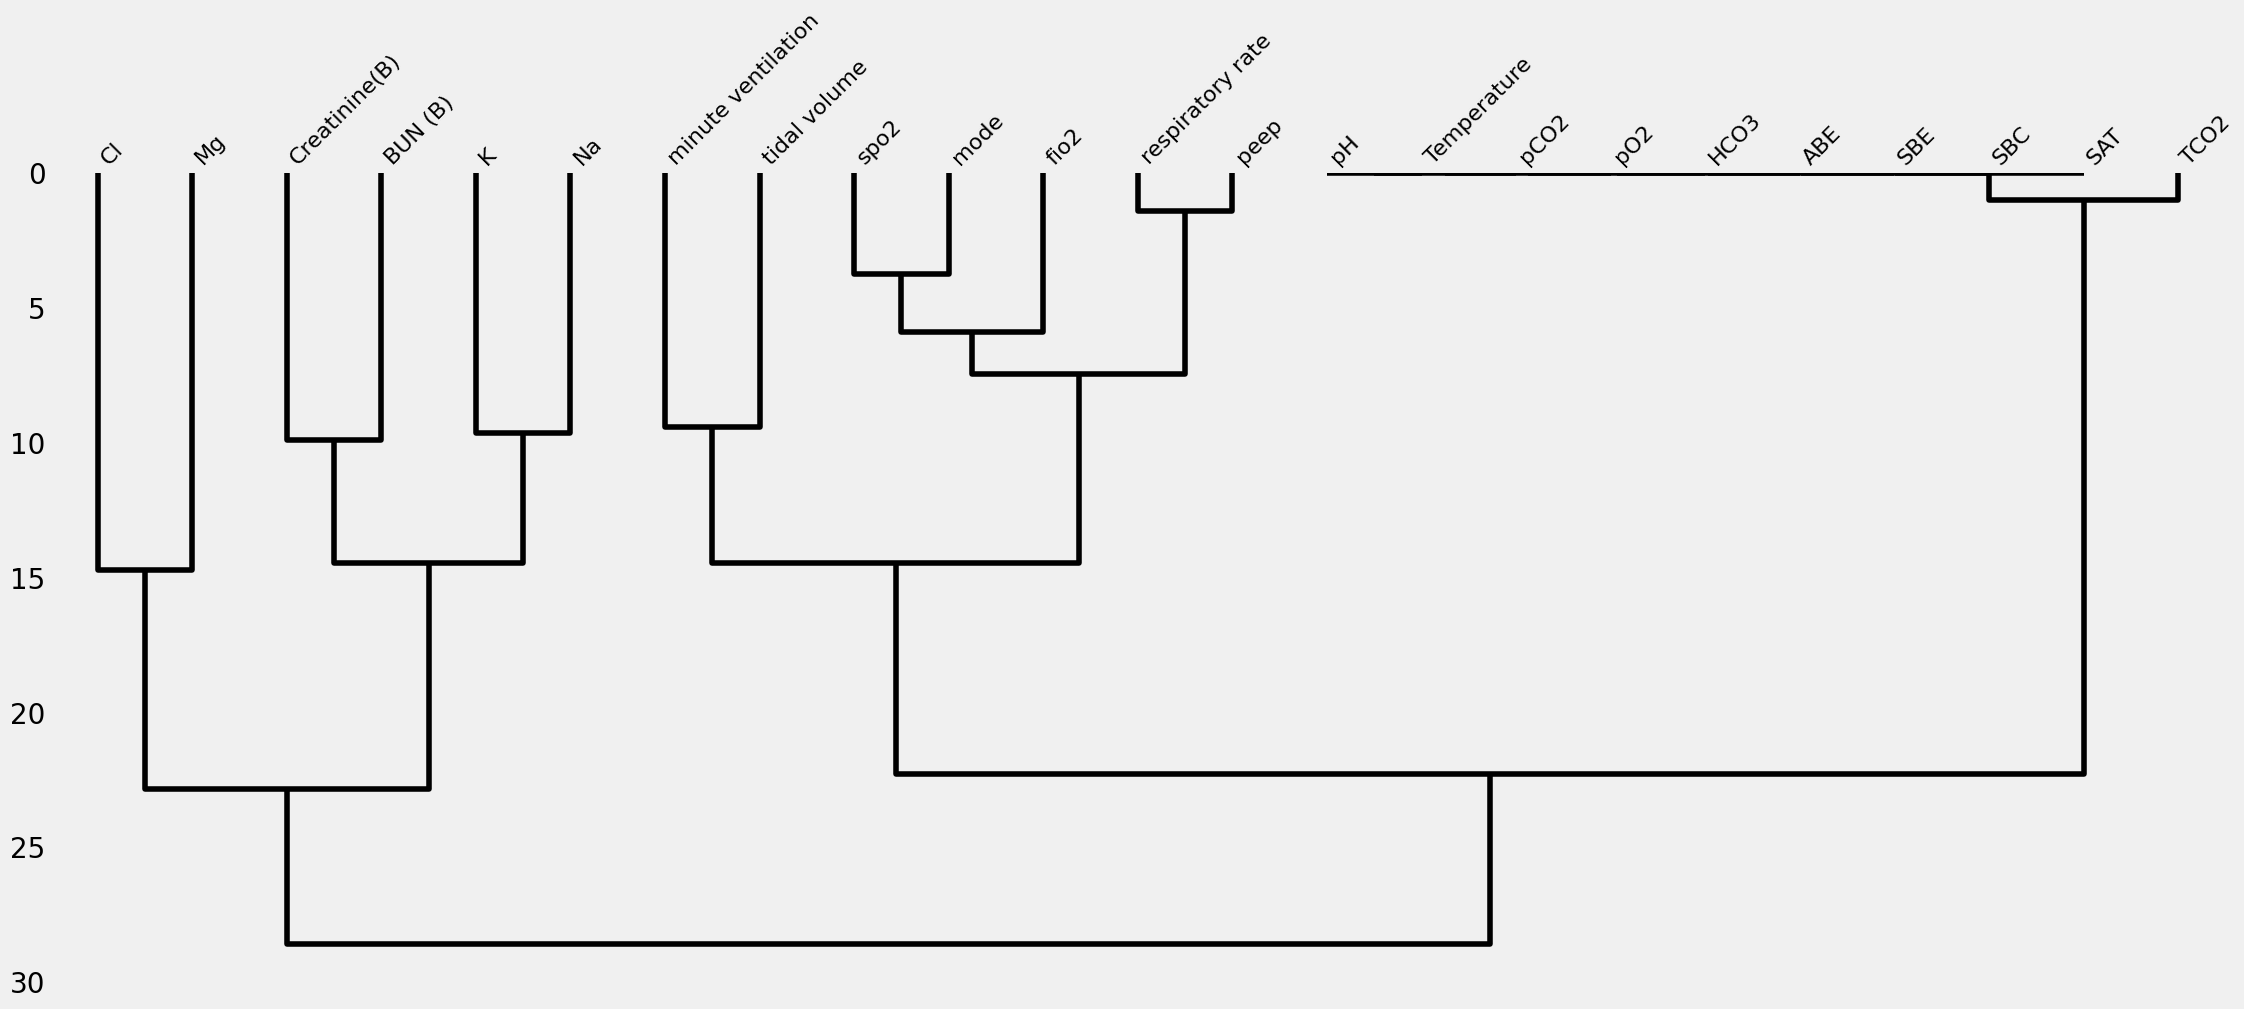

In [132]:
msno.dendrogram(data_before_imputation_missingno)

plt.savefig('/home/yungshun/workspace/py/sklearn-aftygh-respiratory-therapy/datasets/missingno_dendrogram.png', bbox_inches='tight')

In [ ]:
data_before_imputation